In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [2]:
# Define the list of tickers for ESG-focused companies
tickers = ['AAPL', 'MSFT', 'GOOGL', 'TSLA', 'AMZN']  # Example tickers

# Download historical market data
esg_data = yf.download(tickers, period='1y', interval='1d')
print(esg_data.head())


[*********************100%***********************]  5 of 5 completed

Price                       Adj Close                                      \
Ticker                           AAPL        AMZN       GOOGL        MSFT   
Date                                                                        
2023-10-25 00:00:00+00:00  170.228928  121.389999  125.299736  338.131989   
2023-10-26 00:00:00+00:00  166.040344  119.570000  121.977966  325.447205   
2023-10-27 00:00:00+00:00  167.363586  127.739998  121.868233  327.352875   
2023-10-30 00:00:00+00:00  169.423035  132.710007  124.152580  334.796997   
2023-10-31 00:00:00+00:00  169.900620  133.089996  123.773521  335.591034   

Price                                       Close                          \
Ticker                           TSLA        AAPL        AMZN       GOOGL   
Date                                                                        
2023-10-25 00:00:00+00:00  212.419998  171.100006  121.389999  125.610001   
2023-10-26 00:00:00+00:00  205.759995  166.889999  119.570000  122.279999  

In [3]:
esg_data.fillna(esg_data.mean(), inplace=True)
print(esg_data.isnull().sum())  # Check for any remaining missing values


Price      Ticker
Adj Close  AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
           TSLA      0
Close      AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
           TSLA      0
High       AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
           TSLA      0
Low        AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
           TSLA      0
Open       AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
           TSLA      0
Volume     AAPL      0
           AMZN      0
           GOOGL     0
           MSFT      0
           TSLA      0
dtype: int64


In [4]:
esg_data = pd.get_dummies(esg_data, drop_first=True)
print(esg_data.head())  # Check the transformed data


Price                       Adj Close                                      \
Ticker                           AAPL        AMZN       GOOGL        MSFT   
Date                                                                        
2023-10-25 00:00:00+00:00  170.228928  121.389999  125.299736  338.131989   
2023-10-26 00:00:00+00:00  166.040344  119.570000  121.977966  325.447205   
2023-10-27 00:00:00+00:00  167.363586  127.739998  121.868233  327.352875   
2023-10-30 00:00:00+00:00  169.423035  132.710007  124.152580  334.796997   
2023-10-31 00:00:00+00:00  169.900620  133.089996  123.773521  335.591034   

Price                                       Close                          \
Ticker                           TSLA        AAPL        AMZN       GOOGL   
Date                                                                        
2023-10-25 00:00:00+00:00  212.419998  171.100006  121.389999  125.610001   
2023-10-26 00:00:00+00:00  205.759995  166.889999  119.570000  122.279999  

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
esg_data_scaled = scaler.fit_transform(esg_data)
print(esg_data_scaled[:5])  # Check the scaled data


[[-1.28209785e+00 -2.98670236e+00 -1.78376462e+00 -2.56811777e+00
   1.36980831e-01 -1.27094524e+00 -2.98670236e+00 -1.78540235e+00
  -2.57225950e+00  1.36980831e-01 -1.24097194e+00 -2.75702275e+00
  -1.69432290e+00 -2.46964878e+00  2.51900139e-01 -1.22651930e+00
  -2.92174579e+00 -1.73695362e+00 -2.56620865e+00  2.77412066e-01
  -1.22472465e+00 -2.67532396e+00 -1.62412658e+00 -2.39669410e+00
   2.52846651e-01 -4.55611595e-02  1.83663295e+00  5.19349936e+00
   4.00738795e+00  2.55880501e-01]
 [-1.47790871e+00 -3.09340834e+00 -1.98223858e+00 -3.03644103e+00
  -8.64422754e-02 -1.46955326e+00 -3.09340834e+00 -1.98474336e+00
  -3.05393172e+00 -8.64422754e-02 -1.31934994e+00 -3.02884712e+00
  -1.93001217e+00 -2.64116102e+00  7.71853659e-02 -1.46575619e+00
  -3.06540411e+00 -1.96568734e+00 -2.97060937e+00  2.59884573e-02
  -1.29583893e+00 -2.98823766e+00 -1.91599787e+00 -2.56449959e+00
   9.99517235e-02  4.01644552e-01  3.33977966e+00  2.69951601e+00
   1.94856787e+00  5.11287610e-01]
 [-1.4

In [6]:
target = esg_data.iloc[:, -1]  # Assuming the last column is the target
bins = [-np.inf, target.quantile(0.25), target.quantile(0.5), target.quantile(0.75), np.inf]
labels = [0, 1, 2, 3]  # Example labels for the bins
target_binned = pd.cut(target, bins=bins, labels=labels)
print(target_binned.value_counts())  # Check the distribution of the binned target


(Volume, TSLA)
0    63
1    63
2    63
3    63
Name: count, dtype: int64


In [7]:
X = esg_data_scaled[:, :-1]  # Features
y = target_binned.values     # Binned target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)  # Check the shapes of the splits


(201, 29) (51, 29) (201,) (51,)


In [8]:
model = RandomForestClassifier(n_estimators=100, random_state=42)


In [9]:
model.fit(X_train, y_train)
print("Model training completed.")


Model training completed.


In [10]:
y_pred = model.predict(X_test)
print(y_pred[:10])  # Check the first 10 predictions


[0 3 2 3 0 2 0 0 3 2]


In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 58.82%


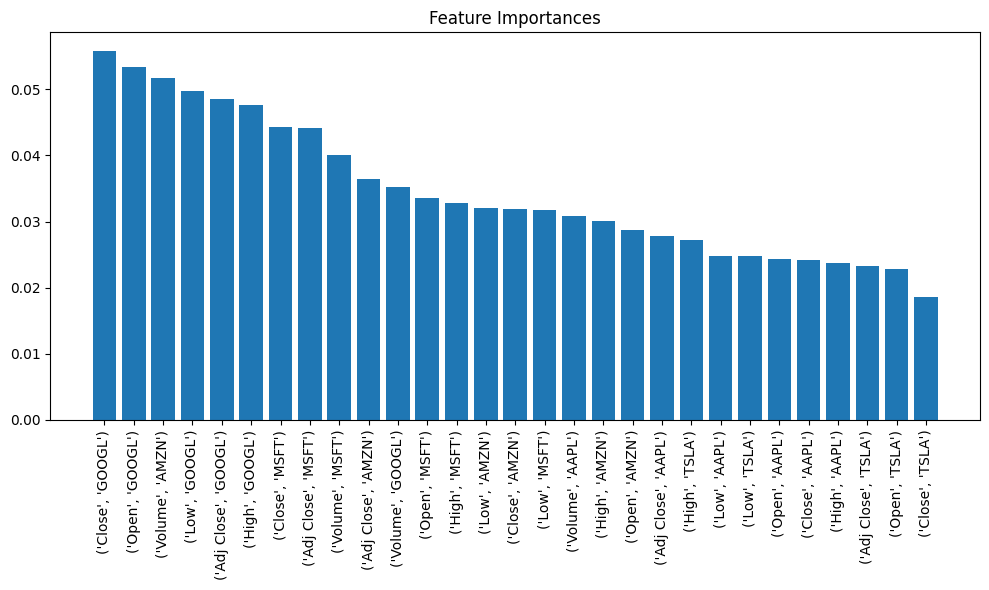

In [12]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), esg_data.columns[indices], rotation=90)
plt.tight_layout()
plt.show()


In [22]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (201, 29)
X_test shape: (51, 29)
y_train shape: (201,)
y_test shape: (51,)


In [23]:
y_pred = model.predict(X_test)
print("Predictions:", y_pred[:10])  # Print the first 10 predictions


Predictions: [0 3 2 3 0 2 0 0 3 2]


In [24]:
print(esg_data.head())  # Print the first few rows of the data


Price                       Adj Close                                      \
Ticker                           AAPL        AMZN       GOOGL        MSFT   
Date                                                                        
2023-10-25 00:00:00+00:00  170.228928  121.389999  125.299736  338.131989   
2023-10-26 00:00:00+00:00  166.040344  119.570000  121.977966  325.447205   
2023-10-27 00:00:00+00:00  167.363586  127.739998  121.868233  327.352875   
2023-10-30 00:00:00+00:00  169.423035  132.710007  124.152580  334.796997   
2023-10-31 00:00:00+00:00  169.900620  133.089996  123.773521  335.591034   

Price                                       Close                          \
Ticker                           TSLA        AAPL        AMZN       GOOGL   
Date                                                                        
2023-10-25 00:00:00+00:00  212.419998  171.100006  121.389999  125.610001   
2023-10-26 00:00:00+00:00  205.759995  166.889999  119.570000  122.279999  

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['sqrt', 'log2', None],  # Corrected values
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')


Fitting 3 folds for each of 324 candidates, totalling 972 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [30]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
xgb_y_pred = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
print(f'XGBoost Accuracy: {xgb_accuracy * 100:.2f}%')


XGBoost Accuracy: 54.90%


In [31]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)
print(f'Cross-Validation Accuracy: {np.mean(cv_scores) * 100:.2f}%')


Cross-Validation Accuracy: 22.20%


Confusion Matrix:
 [[10  1  1  0]
 [ 3  4  2  1]
 [ 1  2  7  2]
 [ 2  1  5  9]]


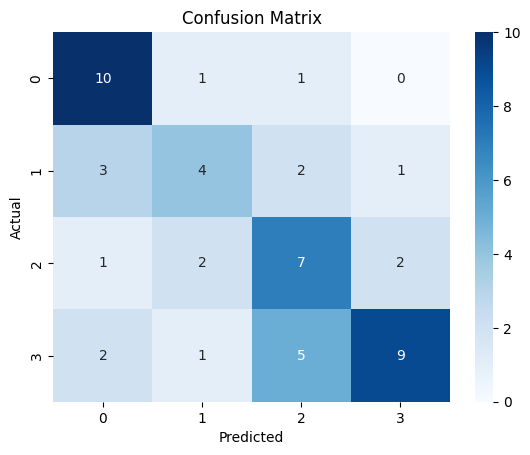

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)  # Print the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [33]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)  # Print the classification report


Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.83      0.71        12
           1       0.50      0.40      0.44        10
           2       0.47      0.58      0.52        12
           3       0.75      0.53      0.62        17

    accuracy                           0.59        51
   macro avg       0.59      0.59      0.57        51
weighted avg       0.60      0.59      0.58        51

